## **Example usage of the tracer_calc package**  

Tracercalc is a light weight python library for planning tracer tests. This notebook demonstrates the libraries capabilities.

**1. First import the package**

In [1]:
from tracer_calc import *

**2. We set some aquifer parameters describe groundwater flow using some estimations**  


In [2]:
distance = 200 # Distance between the injection and sampling point in meters
aquifer_thickness = 50 # Average thickness of the aquifer in meters
aquifer_porosity = 0.05 # Average porosity of the aquifer
relative_fluorecense_yield = 0.18 # We use pyranine, therefor the fluorecense yield is 18%
gradient = 0.025 # The gradient of the hydraulic head of the groundwater.
hydraulic_conductivity = 0.000001 # The hydraulic conductivity of the aquifer.

distance_velocity = calculate_distance_velocity(
    gradient=gradient, 
    hydraulic_conductivity=hydraulic_conductivity,
    porosity=aquifer_porosity
)

flow_rate = estimate_aquifer_flow_rate(
    distance_velocity=distance_velocity, 
    distance=distance, 
    thickness=aquifer_thickness
)

# We estimate the water volume affected by a dipole well test.
water_volume = estimate_volume_well_test(
    distance=distance,
    aquifer_thickness=aquifer_thickness,
    aquifer_porosity=aquifer_porosity,
    is_dipole=True
)

print(f"distance velocity: {distance_velocity}")
print(f"flow rate: {flow_rate}")
print(f"water volume: {water_volume}")

distance velocity: 5e-07
flow rate: 0.00025
water volume: 942477.796076938


**4. Estimating needed tracer amount using aquifer parameters**

In [3]:
mass = estimate_tracer_mass(
    volume=water_volume,
    relative_fluorecense_yield=relative_fluorecense_yield,
    out_unit=MassUnit.GRAMS
)

print(f"{mass} grams")

523.598775598299 grams


**3. Modelling break through curves using a 1D approximation of the Advection Dispersion Equation (ADE)**

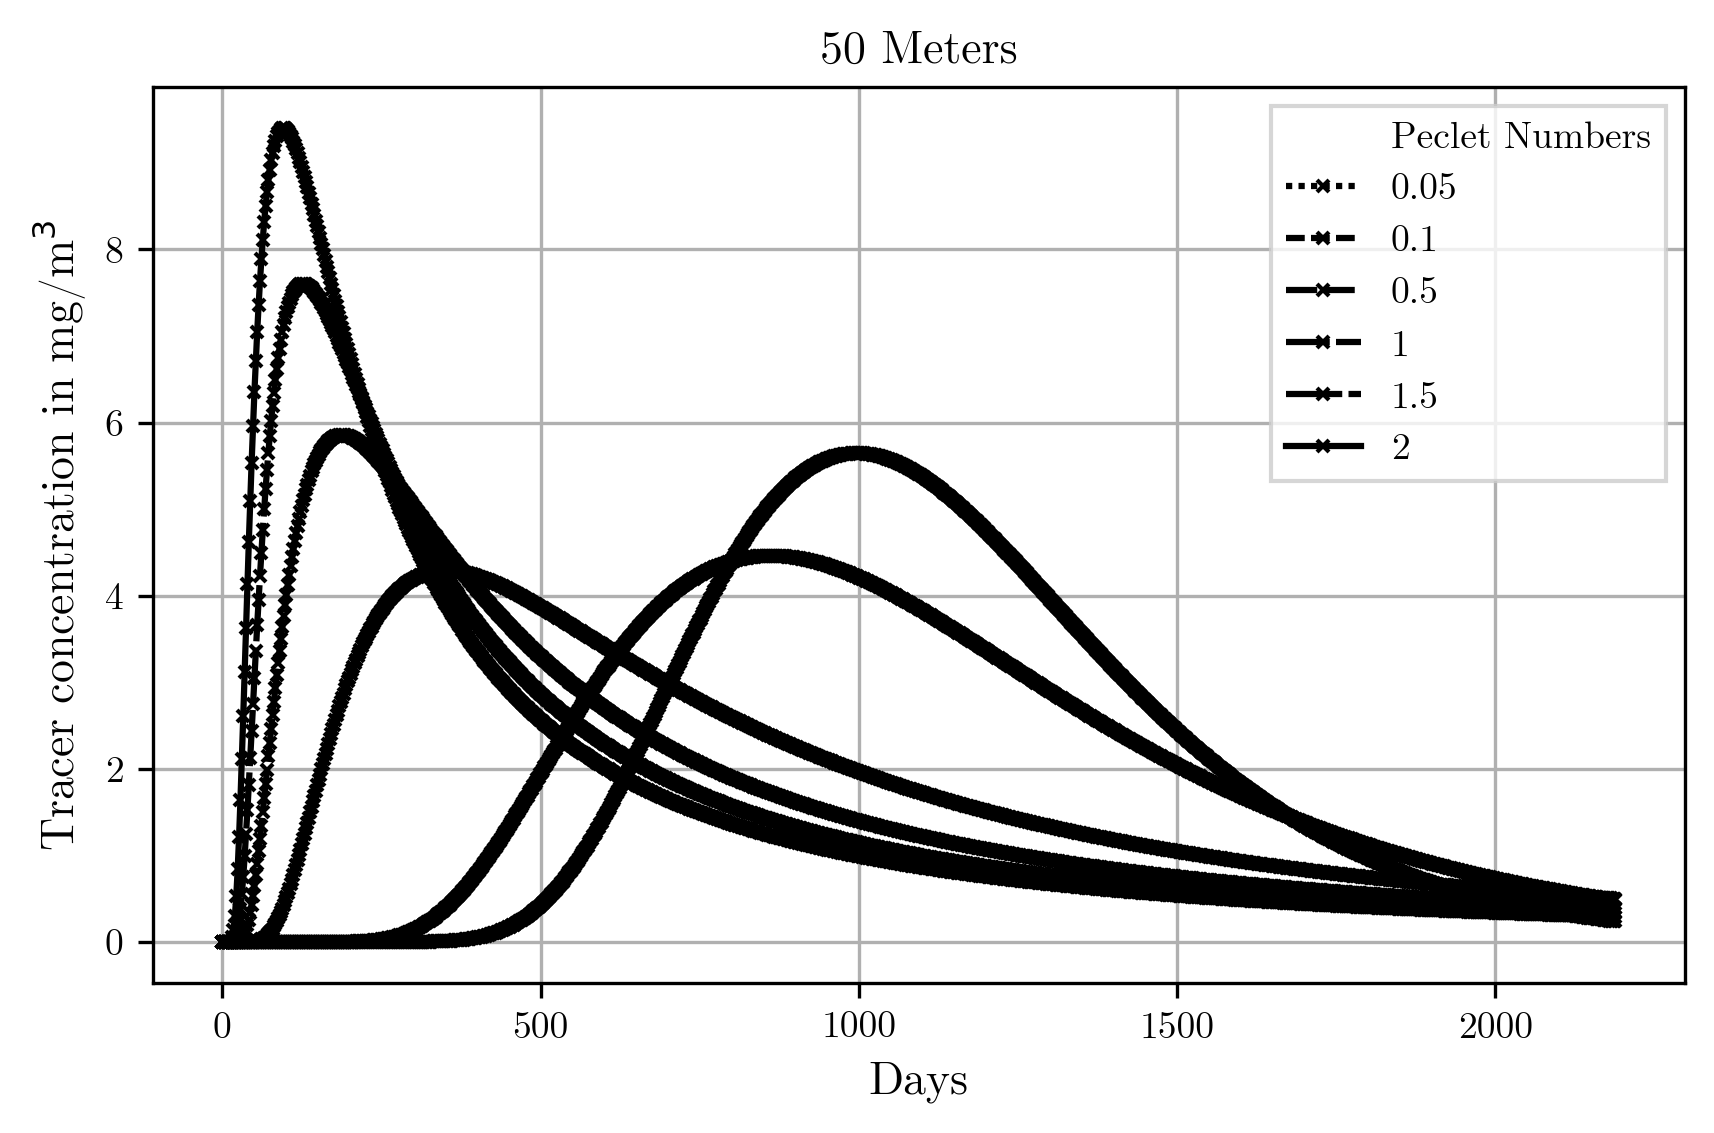

In [30]:
# we can define at which distance 
# we want to model the breakthough curve
observation_distance = 50 

model = model_breakthrough_curve_1D(
    start_time=0,
    end_time=TimeUnit().years(6),
    timestep_count=1000,
    distance=observation_distance,
    distance_velocity=distance_velocity,
    flow_rate=flow_rate,
    tracer_mass=MassUnit().grams(100),
    peclet=[0.05, 0.1, 0.5, 1, 1.5, 2]
)

plot_models(
    breakthough_model=model,
    graph_time_unit=TimeUnit.DAYS,
    title = "50 Meters",
    font="CMU Serif"
)

**4. Modelling break through curves using a 2D approximation of the ADE**

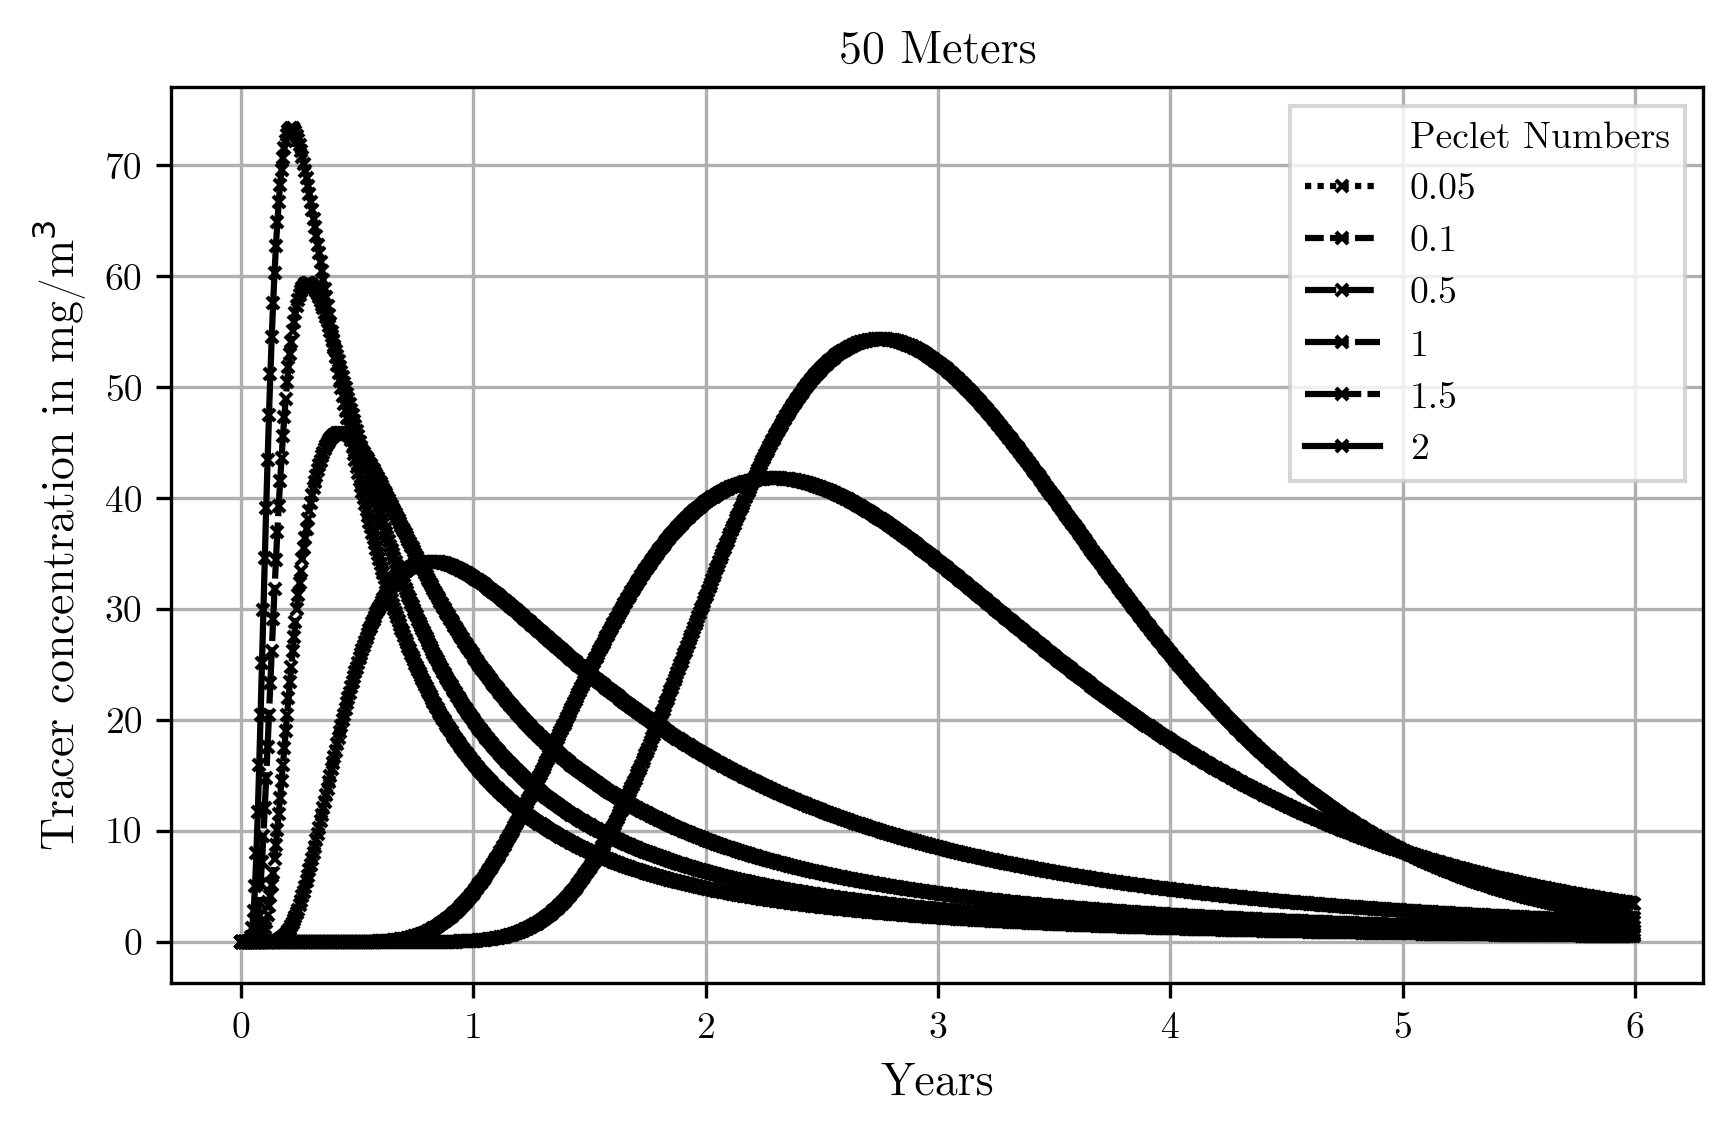

In [29]:
# we can define at which distance 
# we want to model the breakthough curve
observation_distance = 50

model_2d = model_breakthrough_curve_2D(
    start_time=0,
    end_time=TimeUnit().years(6),
    timestep_count=1000,
    distance=observation_distance,
    aquifer_porosity=aquifer_porosity,
    aquifer_thickness=aquifer_thickness,
    distance_velocity=distance_velocity,
    peclet = [0.05, 0.1, 0.5, 1, 1.5, 2],
    tracer_mass=MassUnit().grams(100)
)

plot_models(
    breakthough_model=model_2d,
    graph_time_unit=TimeUnit.YEARS,
    title = "50 Meters",
    font="CMU Serif"
)

**5. Finding good sampling rates**

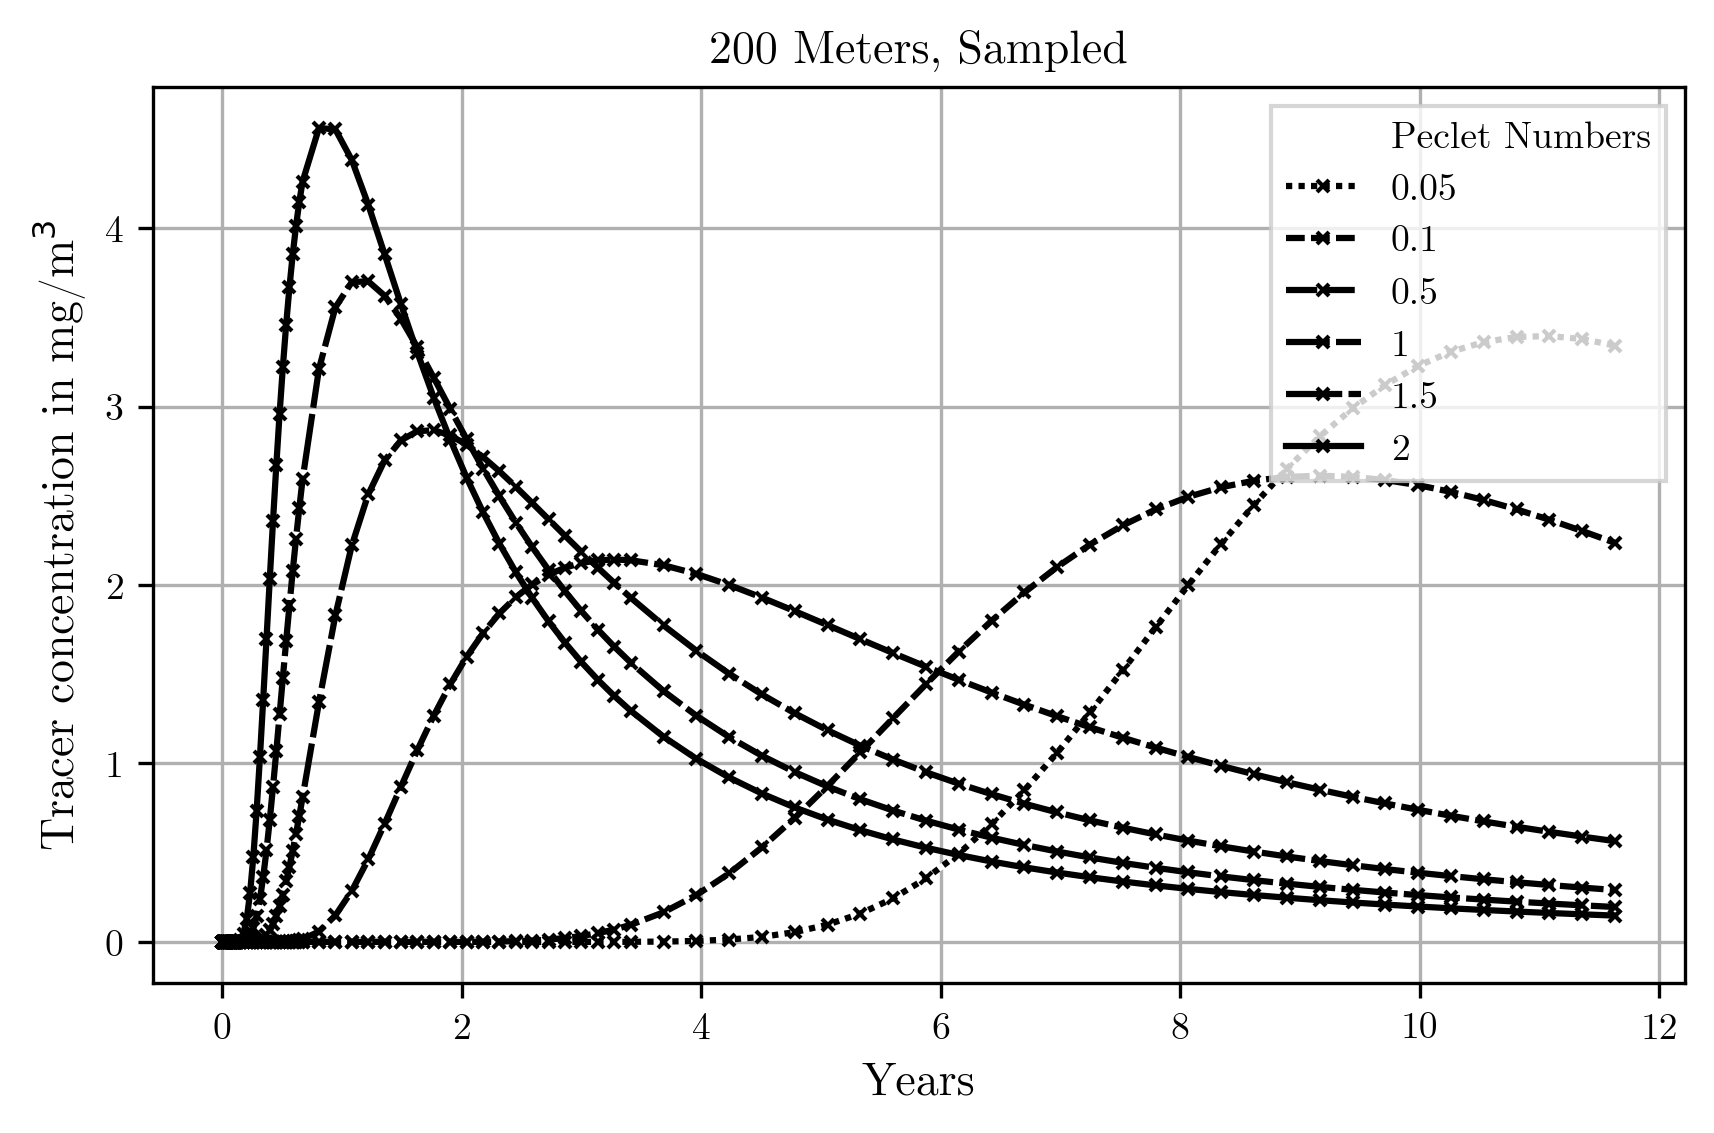

In [28]:
sample_times = [(i+1) * TimeUnit().hours(12) for i in range(10)] # Sample 10 times every 12 hours
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(2) for i in range(20)] # then 10 times every 2 days
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(10) for i in range(20)] # then 10 times every 10 days
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(50) for i in range(20)] # then 10 times every 50 days
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(100) for i in range(30)] # then 10 times every 100 days

sample = sample_model(model=model_2d, sample_times=sample_times)

plot_models(
    breakthough_model=sample,
    graph_time_unit=TimeUnit.YEARS,
    title = "200 Meters, Sampled",
    font="CMU Serif"
)

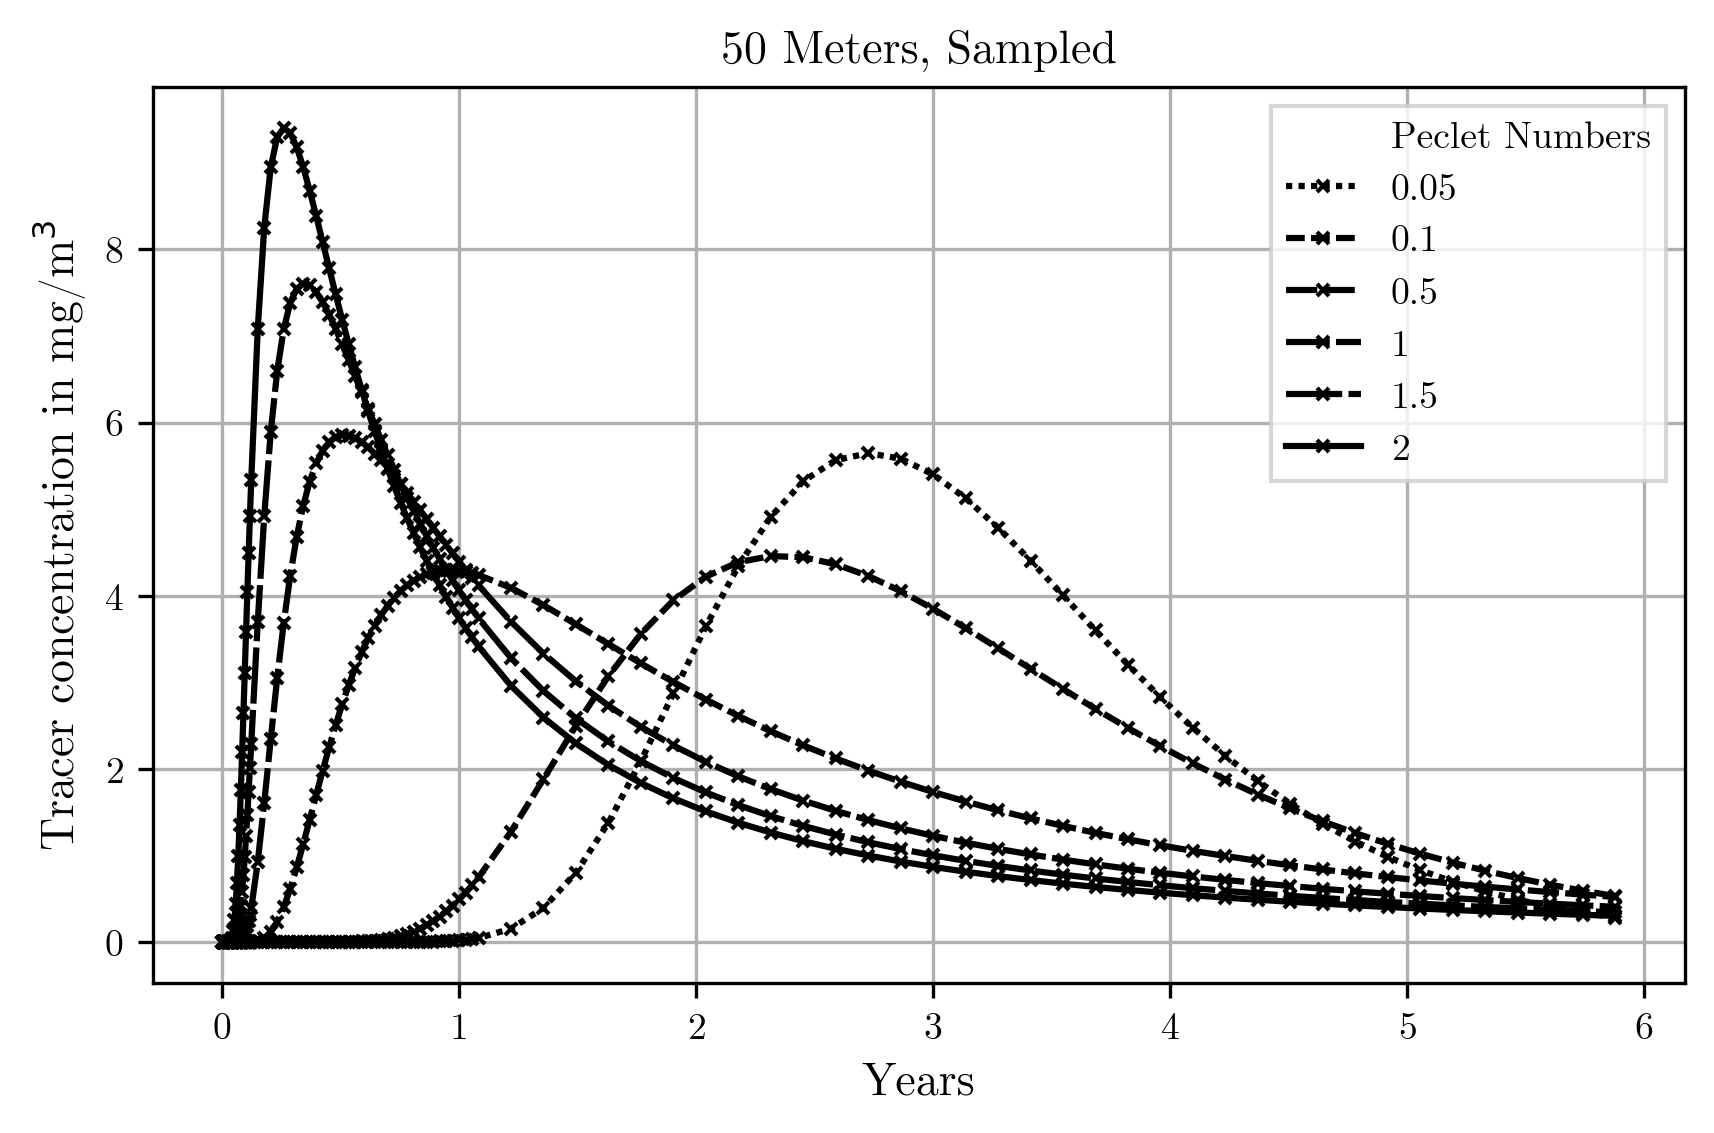

In [32]:
sample_times = [(i+1) * TimeUnit().hours(12) for i in range(10)] # Sample 10 times every 12 hours
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(2) for i in range(20)] # then 10 times every 2 days
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(10) for i in range(35)] # then 10 times every 10 days
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(50) for i in range(20)] # then 10 times every 50 days
sample_times += [sample_times[-1] + (i+1) * TimeUnit().days(50) for i in range(15)] # then 10 times every 50 days

sample = sample_model(model=model, sample_times=sample_times)

plot_models(
    breakthough_model=sample,
    graph_time_unit=TimeUnit.YEARS,
    title = "50 Meters, Sampled",
    font="CMU Serif"
)